# Notebook objectives
* **Define machine learning**
* **Discuss estimation and cost/loss functions**
* **Some common syntax and conventions for data**
* **General types of machine learning**
* **Where to find data**
* **Loading data and initial inspection**
* **Train test splits**
* **Fitting a tree regression model**
* **Bias/variance trade-off**
* **Overfitting and underfitting**
* **What are hyperparameters and how do we set them**
* **Grid searching and K-fold cross validation**
* **BONUS: Time-series data**

In [1]:
import matplotlib.pyplot as plt  # plotting data
import pandas as pd  # working with dataframes (tables)
import numpy as np  # math, arrays, vectors, matrices
from sklearn.model_selection import train_test_split, GridSearchCV  # sklearn for most things ML <3
from sklearn.tree import DecisionTreeRegressor  # regression model prone to overfitting

# show plots in notebook
%matplotlib inline 

<hr>
# What is machine learning according to a Google search?  


#### Does this image increase your understanding of ML?

<img src="images/ml_brain.jpg" align="left"></img> 

<hr>
# Name inflation:

<img src="images/ai_face.jpg" width=700 align="right"></img>

* **Statistics**
* **Statistical Learning**
* **Machine Learning**
* **Artificial Intelligence (AI)**

<hr>
# Machine learning is estimating and minimizing error

<img src="images/lin_reg.jpg" width=700 align="right"></img>  

**x** = independent variable   
**y** = dependent or target variable  
**^** used to denote an estimate  
**-** used to denote the mean

### Possibly familiar format
* Estimation equation:  $\hat{y} = mx + b$
* Scoring:  $\Sigma(y - \hat{y})^2$ 

### Machine learning format 
* Estimation equation:  $\hat{y} = \beta_0 + \beta_1 x_1...$
* Cost or loss function: $\Sigma(y - \hat{y})^2$

#### Why square the difference? 

<hr>
# Some common syntax

* Scalar is a number
* Vector is a collection of scalars that is 1-dimensional (a sequence of scalars)
    * Typically represented with a lowercase letter such as y
* Matix is a collection of vectors that is generally 2-dimensional (a table of data)
    * Typically represented with an uppercase letter such as X
    * The rows or columns of the matrix are vectors  


#### Which one of these terms generally describes the target variable?  
#### Which one of these terms generally describes the data for your model?
<br>
<br>
<img src="images/scalar-vector-matrix.svg" align="left"></img>

<hr>
# Types of machine learning

<img src="images/ml_types.jpg" align="right"></img>

### Supervised learning (y is known)
#### Regression (y is continuous)
* Linear models (linear, polynomial, Poisson regressions, etc)
* Time series forecasting (autoregression)
* Tree models (decision trees, random forests, boosted trees)  

#### Classification (y represents a class)
* K-nearest neighbors
* Logistic regression
* Support vector machines
* Tree models (decision trees, random forests, boosted trees)
* Neural networks (deep learning)

### Unsupervised learning (y is unknown)
#### Clustering (creates groups and assigns y)
* K-means (groups by distance from centroids)
* Hierarchical (groups based on similarity)
* DBSCAN (groups based upon density)

#### What other machine learning algorithsms missing from the list?  
#### What are some business that make their money off regression? How about classification?

<hr>
# Load data
Original data obtained from obtained from [Seattle Real Time Fire 911 Calls](https://data.seattle.gov/Public-Safety/Seattle-Real-Time-Fire-911-Calls/kzjm-xkqj). The [Seattle Open Data Portal](https://data.seattle.gov/browse?limitTo=datasets) has a bunch of fun real (and sometimes messy) data to play with.

Features were created and data was aggegrated to generate the dataset found in the data directory. This date was fueled a personal project that uses Poisson regression and K-means clustering to estimate number of medical emergencies in each area of Seattle and optimal placements for emergency response vehicles given historical data.

Additionally, you can find "toy" datasets in the following locations:
* Built into Python (sklearn.datasets) or in R
* Kaggle [datasets](https://www.kaggle.com/datasets) or [contests](https://www.kaggle.com/competitions)
* UCI Machine Learning [datasets](https://archive.ics.uci.edu/ml/datasets.html)

#### You actually have a huge advantage over most people interested in exploring ML! What are some interesting pieces of data to study here at Nordstrom?

In [2]:
# load data, check for nulls, ensure it's properly cast, and create X and y
df = pd.read_csv('../data/model_data.csv', index_col=0)
data_cols = [col for col in df.columns if col != 'freq']
X = df[data_cols]
y = df.freq
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33059 entries, 1 to 33059
Data columns (total 22 columns):
mariners_home    33059 non-null int64
seahawks_home    33059 non-null int64
sounders_home    33059 non-null int64
trav_holiday     33059 non-null int64
dang_holiday     33059 non-null int64
night            33059 non-null int64
Monday           33059 non-null int64
Saturday         33059 non-null int64
Sunday           33059 non-null int64
Thursday         33059 non-null int64
Tuesday          33059 non-null int64
Wednesday        33059 non-null int64
day_num          33059 non-null int64
zone1            33059 non-null int64
zone2            33059 non-null int64
zone3            33059 non-null int64
zone4            33059 non-null int64
zone5            33059 non-null int64
zone6            33059 non-null int64
zone7            33059 non-null int64
seasonality      33059 non-null float64
freq             33059 non-null int64
dtypes: float64(1), int64(21)
memory usage: 5.8 MB


### What useful features might I have forgotten?

In [3]:
# look at first few rows
df.head(10)

,mariners_home,seahawks_home,sounders_home,trav_holiday,dang_holiday,night,Monday,Saturday,Sunday,Thursday,...,day_num,zone1,zone2,zone3,zone4,zone5,zone6,zone7,seasonality,freq
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1.824157,20
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1.824157,29
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1.824157,30
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.824157,24
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1.824157,15
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1.824157,19
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1.824157,13
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1.824157,4
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1.824157,5
10,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1.824157,6


In [4]:
# examine some summary statistics
df.describe()

,mariners_home,seahawks_home,sounders_home,trav_holiday,dang_holiday,night,Monday,Saturday,Sunday,Thursday,...,day_num,zone1,zone2,zone3,zone4,zone5,zone6,zone7,seasonality,freq
count,33059.000000,33059.000000,33059.000000,33059.000000,33059.000000,33059.000000,33059.000000,33059.000000,33059.000000,33059.000000,...,33059.000000,33059.000000,33059.000000,33059.000000,33059.000000,33059.000000,33059.000000,33059.000000,33059.000000,33059.000000
mean,0.273753,0.022626,0.046493,0.016092,0.005717,0.503252,0.141716,0.141928,0.139992,0.143985,...,1175.801204,0.135122,0.135152,0.135092,0.135122,0.135122,0.135122,0.135122,1.027694,16.633231
std,0.445890,0.148711,0.210553,0.125833,0.075396,0.499997,0.348764,0.348982,0.346984,0.351080,...,656.590289,0.341859,0.341891,0.341827,0.341859,0.341859,0.341859,0.341859,0.712119,8.564726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,619.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310983,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1178.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.065537,16.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1744.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.747303,22.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2303.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,95.000000


<hr>
# Split data into training and tests sets

* The training set is used to train the model
* The test data set is used to validate the model and explore its generalizability

#### Why is it important to split the data?

In [5]:
# make train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=97)
# create an array of model complexities (tree depths)
depths = range(1,36)
train_scores, test_scores = [], []
# test the different model complexities
for depth in depths:
    DTR = DecisionTreeRegressor(max_depth=depth)
    DTR.fit(X_train, y_train)
    train_scores.append(-DTR.score(X_train, y_train))
    test_scores.append(-DTR.score(X_test, y_test))    

<hr>
# Hold on, I am doing something wrong!  
#### What critical mistake have I made? (Hint, it's related to the *structure* of this dataset)

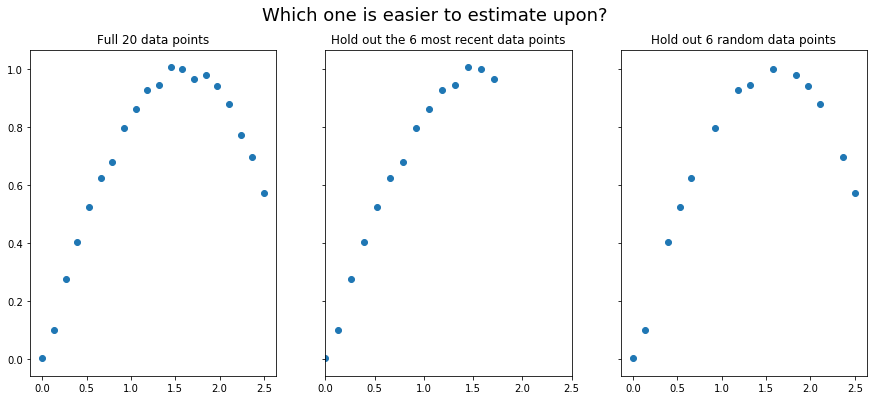

In [6]:
# make some fake data
lin = np.linspace(0, 2.5, 20)
sin_lin = np.sin(lin) + np.random.randn(20) / 40  # sin curve with some noise
# plot data
fig, ax = plt.subplots(1, 3, sharey=True)
fig.set_figheight(6)
fig.set_figwidth(15)
# all data points
ax[0].scatter(lin, sin_lin)
ax[0].set_title('Full 20 data points')
# hold out the 6 most recent data points
ax[1].scatter(lin[0: 14], sin_lin[0: 14]) # keep the first 14 datapoints
ax[1].set_xlim([0,2.5])
ax[1].set_title('Hold out the 6 most recent data points')
# hold out 6 random data points
ax[2].scatter(lin[(0, 1, 3, 4, 5, 7, 9, 10, 12, 14, 15, 16, 18, 19),],
            sin_lin[(0, 1, 3, 4, 5, 7, 9, 10, 12, 14, 15, 16, 18, 19),]) # keep 14 random datapoints
ax[2].set_title('Hold out 6 random data points')
fig.suptitle('Which one is easier to estimate upon?', fontsize=18);

<hr>
# How does tree regression work?  

* The model makes splits that create the best "fit" and treats the data points above and below the splits differently
* The user has to set the number of splits

#### How does the user determine the correct number of splits?

<img src="images/regtree.png" align="left"></img>

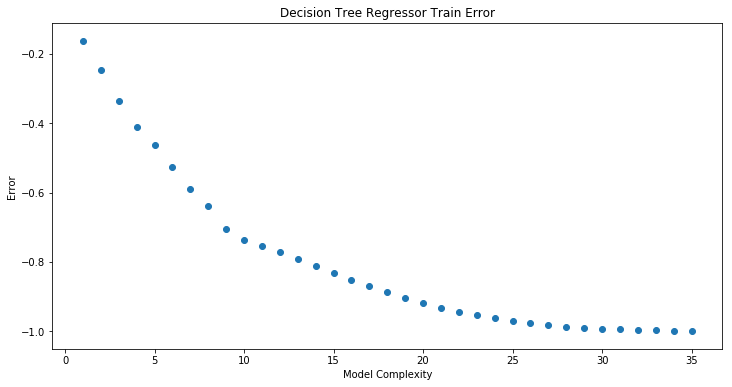

In [7]:
# plot error vs model complexity for training data
plt.figure(figsize=(12, 6))
plt.scatter(depths, train_scores)
plt.ylabel('Error')
plt.xlabel('Model Complexity')
plt.title('Decision Tree Regressor Train Error');

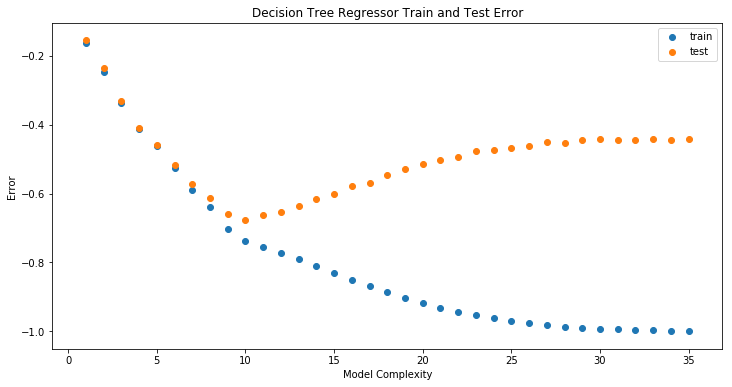

In [8]:
# error vs model complexity for training and test data 
plt.figure(figsize=(12, 6))
plt.scatter(depths, train_scores, label='train')
plt.scatter(depths, test_scores, label='test')
plt.ylabel('Error')
plt.xlabel('Model Complexity')
plt.title('Decision Tree Regressor Train and Test Error')
plt.legend();

<hr>
# Bias/variance trade off and under/overfitting

* Bias refers to the error introduced by approximating a complex real-world problem with a simpler model (rigidity and relationship assumptions)
* Variance describes the degree to which the estimation equation will vary if trained on a different dataset (flexibility)

If the model has overly high bias, it will be too inflexible to effectively approximate the data. This type of model is **underfit** (see below left). If the model has overly high variance, it will not be generalizable to other data. When the model fits the training data, but is not generalizable to other data, it is said to be **overfit** (see below right).

[Matt Drury](https://github.com/madrury) created a fantastic [visualization tool](http://madrury.github.io/smoothers/) for bias and variance.

#### How can we determine if a model is underfit?  
#### How can we determine if a model is overfit?


<img src="images/bias_variance.png" align="left"></img>

<hr>
# So what exactly is happening in our Seattle 911 example?


#### Does max_depth 2 fit the data?  
#### Does max_depth 5 fit the data?

<img src="images/overfit_tree_reg.png" width=700 align="left"></img>

<hr>
# What are hyperparameters?

* Parameters of the model that are not directly "learned" from the data
* Generally set before the model is run
* Optimized through trial and error
* Often controls bias/variance trade off for model

#### Wouldn't it be great if there was an easy way to test hyperparameters?

<hr>
# Grid searching and cross-validation

* K-fold cross validation breaks training data into K training sets and K test sets
* Tools in Python and R for automating the process of use cross validation to test combinations of hyperparemeters 

#### Why is it desirable to create more training sets?  
#### What problems might this help us spot?
#### Are there other methods to accomplish this?

<img src="images/kfold.gif" width=700 align="left"></img>

In [9]:
%%time
# instantiate model and set hyperparaters to test, and instantiate GridSearchCV object
DTR = DecisionTreeRegressor()
param_grid = {'max_depth': range(1, 35)}
GSCV = GridSearchCV(estimator=DTR,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=3,
                    return_train_score=True)
# test the various hypterparameters on each fold
GSCV.fit(X_train, y_train)

CPU times: user 498 ms, sys: 93.5 ms, total: 592 ms
Wall time: 3.5 s


In [10]:
# view list of contents in our GSCV object
sorted(GSCV.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_max_depth',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

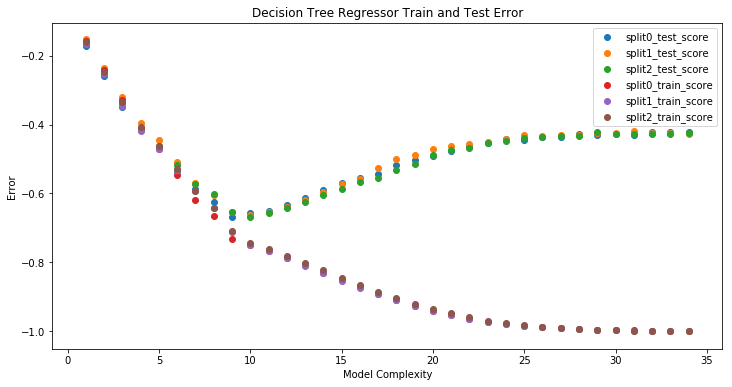

In [11]:
# plot the results of k-fold cross validation
plt.figure(figsize=(12, 6))
x_vals = range(1, 35)
plt.scatter(x_vals, -GSCV.cv_results_['split0_test_score'], label='split0_test_score')
plt.scatter(x_vals, -GSCV.cv_results_['split1_test_score'], label='split1_test_score')
plt.scatter(x_vals, -GSCV.cv_results_['split2_test_score'], label='split2_test_score')
plt.scatter(x_vals, -GSCV.cv_results_['split0_train_score'], label='split0_train_score')
plt.scatter(x_vals, -GSCV.cv_results_['split1_train_score'], label='split1_train_score')
plt.scatter(x_vals, -GSCV.cv_results_['split2_train_score'], label='split2_train_score')
plt.ylabel('Error')
plt.xlabel('Model Complexity')
plt.title('Decision Tree Regressor Train and Test Error')
plt.legend();

<hr>
# A brief aside, let's talk about how to handle time-series data
#### This is beyond the scope of the talk, but good to be aware of...
- Generally it's best to maintain the order of the time-series
- Typically people are trying to predict future points in the series
- Python and R have tools for doing cross validation of time-series data without cheating and peaking ahead
<img src="images/time_series_cv.png" width=700 align="left"></img>

<hr>
# Let's see what happens if our data is messed up

In [12]:
# make some random data and add it to our training data
y_bad = np.random.randint(0, 100, 3000)
X_bad = np.random.rand(3000, 21)
y_train_bad = np.append(y_train, y_bad)
X_train_bad = np.append(X_train, X_bad, axis=0)

In [13]:
# run cross validation on our 'bad data'
GSCV.fit(X_train_bad, y_train_bad)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 35)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

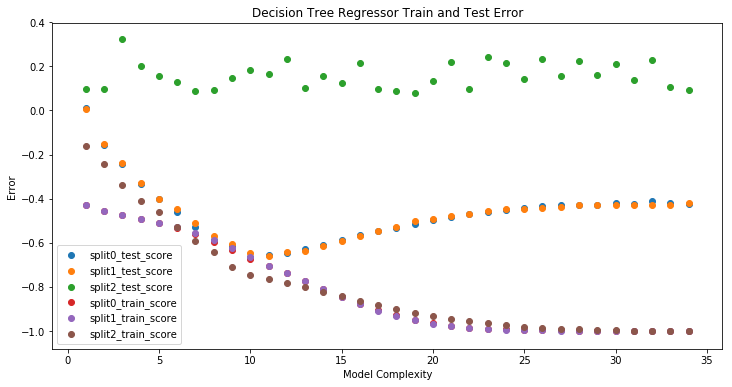

In [14]:
# let's plot the results of k-fold cross validation from our 'bad data'
plt.figure(figsize=(12, 6))
x_vals = range(1, 35)
plt.scatter(x_vals, -GSCV.cv_results_['split0_test_score'], label='split0_test_score')
plt.scatter(x_vals, -GSCV.cv_results_['split1_test_score'], label='split1_test_score')
plt.scatter(x_vals, -GSCV.cv_results_['split2_test_score'], label='split2_test_score')
plt.scatter(x_vals, -GSCV.cv_results_['split0_train_score'], label='split0_train_score')
plt.scatter(x_vals, -GSCV.cv_results_['split1_train_score'], label='split1_train_score')
plt.scatter(x_vals, -GSCV.cv_results_['split2_train_score'], label='split2_train_score')
plt.ylabel('Error')
plt.xlabel('Model Complexity')
plt.title('Decision Tree Regressor Train and Test Error')
plt.legend();

### Notice the green data